<h1 style="text-align: center;">Desafío - Gráficos y correlación</h1>

- Para realizar este desafío debes haber estudiado previamente todo el material disponible correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo del desafío: individual
- Para la realización del desafío necesitarás apoyarte del archivo `Apoyo Desafío - Gráficos y correlación`, disponible en la <a href="https://empieza.desafiolatam.com/cohorts/2091/sections/78278/activities/119106/items/610851">plataforma</a>.

## Habilidades a evaluar
- Reconocer las funcionalidades avanzadas de gráficos estáticos mediante `seaborn`.
- Aprender a realizar gráficos que muestren de forma estratificada el comportamiento de subconjuntos de elementos en la muestra.
- Entender e interpretar la correlación a partir de diagramas de dispersión.

## Descripción
La empresa para la cual trabajas, te ha solicitado continuar el análisis de datos pero, esta vez, a partir de gráficos existentes y la correlación que existe entre ellos con la data disponible. Para ello, te entregan un material de apoyo el cual deberá servir como base para desarrollar los siguientes requerimientos.

## Requerimientos
A continuación revisaremos los requerimientos y acciones que te han sido solicitados:

### 1. Importar librerías y .csv. (2 punto) para ello:
- Importe las librerías básicas para el análisis de datos
- Descargue e importe el archivo nations.csv.

**Tip**: El formato del archivo posee una codificación de tipo `iso-8859-1`. Investigue cómo se puede solucionar este problema utilizando el argumento encoding de `pd.read_csv`.

La base de datos contiene información a nivel mundial sobre demografía:
- `country`: País.
- `region`: Continente del país.
- `gdp`: Producto Interno Bruto per cápita, precios 2005.
- `school`: Promedio años de escolaridad.
- `adfert`: Fertilidad adolescente (Nacimientos 1:1000 en mujeres entre 15 y 19).
- `chldmort`: Probabilidad de muerte antes de los 5 años por cada 1000.
- `life`: Esperanza de vida al nacer.
- `pop`: Población total.
- `urban`: Porcentaje de población urbana.
- `femlab`: Tasa entre hombres y mujeres en el mercado laboral.
- `literacy`: Tasa de alfabetismo.
- `co2`: Toneladas de Co2 mitidas per cápita.
- `gini`: Coeficiente de desigualdad del ingreso.
- **Apellidos desde la A hasta la N**: Enfocarse en las variables `chldmort`, `adfert` y `life`.
- **Apellidos desde la M hasta la Z**: Enfocarse en las variables `femlab`, `literacy` y `school`.

In [1]:
# Utiliza esta celda para importar TODOS los módulos necesarios

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Un stilo para un notebook de color negro
plt.style.use("seaborn")

In [2]:
# Utiliza esta celda para importar el set de datos según lo solicitado

df = pd.read_csv("nations.csv", encoding="ISO-8859-1").drop(columns=["Unnamed: 0"])


df.head()

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


### 2. Refactorizar gráficos matplotlib a seaborn (3 puntos). 

A partir de una serie de gráficos construidos con matplotlib, se solicita refactorizarlos utilizando seaborn. Además, se presenta la función que se utilizó para construirlos. Intente llegar al
resultado con mayor similitud. Comente los principales resultados de los gráficos.

**Histogramas**
```python
def binarize_histogram(dataframe, variable):
    tmp = dataframe.copy()
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    
    plt.subplot(1, 2, 1)
    plt.hist(hist_0, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3)))
    
    plt.subplot(1, 2, 2)
    plt.hist(hist_1, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_1))
    plt.title("{0} >= {1}".format(variable, round(np.mean(hist_0), 3)))
    
binarize_histogram(df, 'adfert')
```



In [3]:
# Utiliza esta celda para definir la función binarize_histogram refactorizada
def binarize_histogram(dataframe, variable):
    # Se debe crear una copia del df original para no alterar el original
    tmp = dataframe.copy()
    
    # Se crea columna binarizada (1 si es mayor a la media, 0 sino)
    bin_col = f'binarize_{variable}'
    media_var = np.mean(tmp[variable])
    tmp[bin_col] = np.where(tmp[variable] > media_var, 1, 0)
    
    # Se crea grilla de seaborn
    g = sns.FacetGrid(
        tmp,                             # Set de datos
        col=bin_col,                     # Nombre de la variable categórica por la que se creará cada gráfico de la grilla (1 para cada categoría)
        col_wrap=2,                      # Cantidad de columnas en la grilla (2 categorías -> 2 columnas)
        sharex=False                     # Queremos que cada gráfico tenga su propia escala en el eje x
    ).map(
        sns.histplot,                    # Gráfico a aplicar a cada elemento de la grilla
        variable,                        # Variable a la que se aplica el gráfico
        color="grey"                     # Los argumentos para modificar el histograma se pasan como kwargs en map
    ) 
    
    # Se obtiene la media para cada clase (0 ó 1) de la columna binarizada
    line_position = tmp.groupby(bin_col)[variable].mean().values

    # Se recorre cada figura de la grilla y su índice
    for i, ax in enumerate(g.axes.flat):
        # Se agrega en cada figura la línea vertical de la media
        ax.axvline(x=line_position[i], color='dodgerblue')
        
        # Símbolo mayor si es clase 1, menor o igual sino
        simbolo = '>' if i else '<='
        
        # Se agrega título para cada figura
        ax.set_title(f"{variable} {simbolo} {round(media_var, 2)}")

    plt.tight_layout()

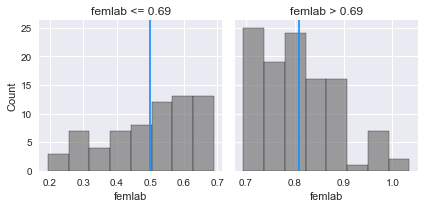

In [4]:
# Utiliza esta celda para graficar los histogramas solicitados utilizando la función refactorizada para tu variable 1

binarize_histogram(df, "femlab")

**Comentarios** Se aprecia que xiste un gran cantidad de paises que su tasa entre hombres y mujeres es superior a la media.

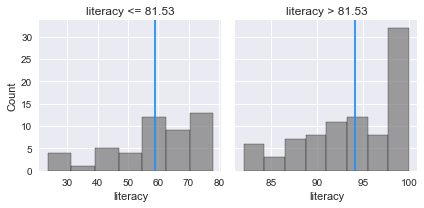

In [5]:
# Utiliza esta celda para graficar los histogramas solicitados utilizando la función refactorizada para tu variable 2

binarize_histogram(df, "literacy")

**Comentarios** Existe una alta frecuencia de paises con una alta tasa de alfabetismo, esto se aprecia
en la ultima barra del gráfico derecho.

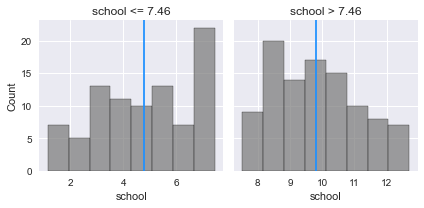

In [6]:
# Utiliza esta celda para graficar los histogramas solicitados utilizando la función refactorizada para tu variable 3

binarize_histogram(df, "school")

**Comentarios** La distribución de frecuencuas en torno a la media es más pareja que respecto a las 2 variables
anteriormente analizadas.

**Boxplots**
```python
def grouped_boxplot(dataframe, variable, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    
    for i, n in enumerate(stratify_by):
        ax[i].boxplot(tmp[tmp[group_by] == n][variable])
        ax[i].set_title(n)

grouped_boxplot(df, 'adfert', 'region')
```

**Comentarios**

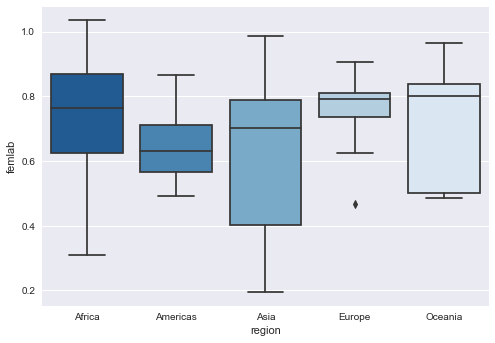

In [7]:
# Utiliza esta celda para graficar los boxplots solicitados utilizando seaborn para tu variable 1

sns.boxplot(x="region", y="femlab", data = df, palette="Blues_r");

**Comentarios** Se aprecia que en las regiones tanto de Asia pero principalmente Europa, la cantodad de nacimientos
es mucho menor a su vez como su varianza si se compara con Africa.

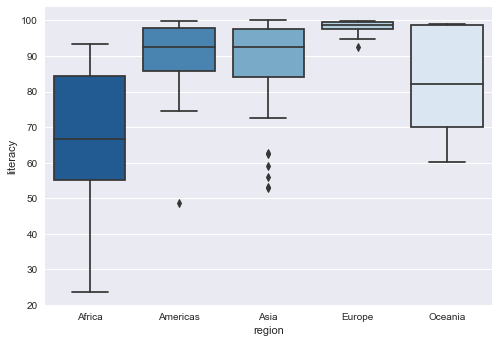

In [8]:
# Utiliza esta celda para graficar los boxplots solicitados utilizando seaborn para tu variable 2**Comentarios**

sns.boxplot(x="region", y="literacy", data = df, palette="Blues_r");

**Comentarios** En general existe una alta tasa de alfabetismo alto. Cabe destacar que Afruca es la región con mejores tasas de alfabetismo por contrario a Europa donde casi en su totalidad de paises presentan una alta tasa de alfabetismo con una baja dispersión.

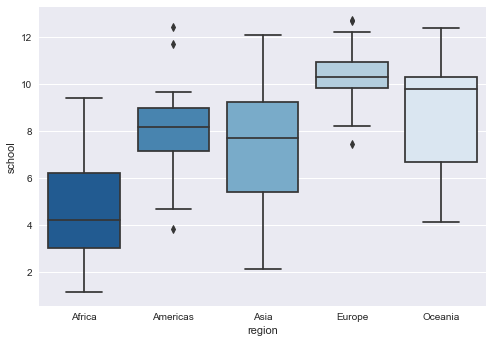

In [9]:
# Utiliza esta celda para graficar los boxplots solicitados utilizando seaborn para tu variable 2**Comentarios**

sns.boxplot(x="region", y="school", data = df, palette="Blues_r");

**Comentarios** A simple vista se aprecia que Africa es la región con menos años de escolaridad y al igual que en la variable antaerior, Europa es la región que tiene mayor frecuencia de paises con altos años de escolaridad y con una baja dispersión. 

**Scatterplots**

```python
def grouped_scatterplot(dataframe, x, y, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()

    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)

    for i, n in enumerate(stratify_by):
        tmp_group_plt = tmp[tmp[group_by] == n]
        ax[i].plot(tmp_group_plt[x], tmp_group_plt[y], 'o')
        ax[i].set_title(n)
        
grouped_scatterplot(df, 'school', 'adfert', 'region')
```

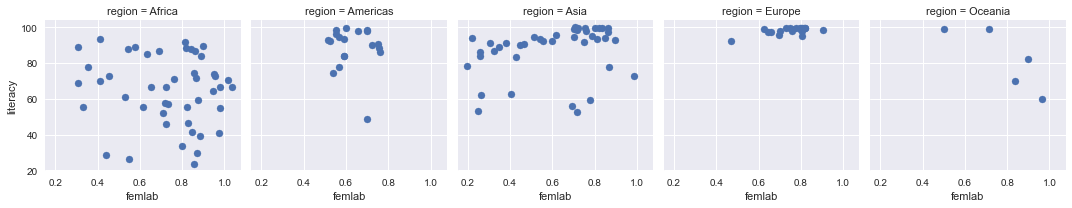

In [10]:
# Utiliza esta celda para graficar los scatterplots solicitados utilizando seaborn para region y tu variable 1

#Grilla (set de datos, nombre de las columnas que queremos en nuestra grilla, cantidad columnas que queremos)
g = sns.FacetGrid(df, col="region", col_wrap=5)

#Que graficos queremos hacer(scatter, variable1, variable 2)
g.map(plt.scatter, "femlab", "literacy");

**Comentarios** En términos generales no se ve una relación entre femlab y literacy en las distintas regiones

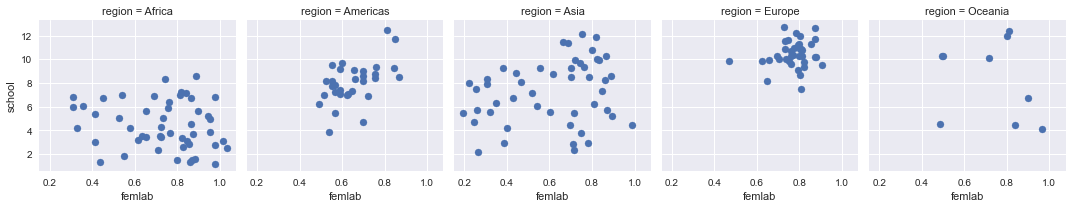

In [11]:
# Utiliza esta celda para graficar los scatterplots solicitados utilizando seaborn para region y tu variable 2

#Grilla (set de datos, nombre de las columnas que queremos en nuestra grilla, cantidad columnas que queremos)
g = sns.FacetGrid(df, col="region", col_wrap=5)

#Que graficos queremos hacer(scatter, variable1, variable 2)
g.map(plt.scatter, "femlab", "school");

**Comentarios** En términos generales no se ve una relación entre femlab y school en las distintas regiones

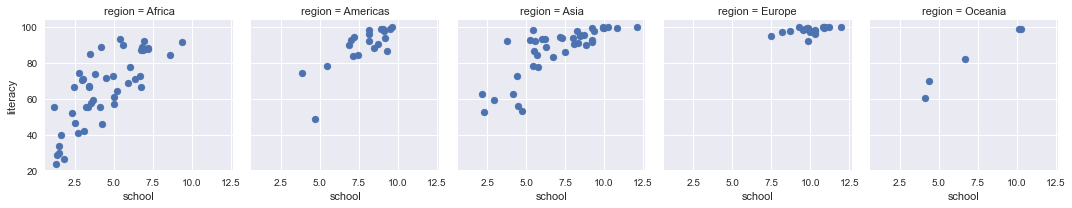

In [12]:
# Utiliza esta celda para graficar los scatterplots solicitados utilizando seaborn para region y tu variable 3

#Grilla (set de datos, nombre de las columnas que queremos en nuestra grilla, cantidad columnas que queremos)
g = sns.FacetGrid(df, col="region", col_wrap=5)

#Que graficos queremos hacer(scatter, variable1, variable 2)
g.map(plt.scatter, "school", "literacy");

**Comentarios** Se puede apreciar qeu existe una relación directa, esto debido que al aumentar los años de escolaridad
aumenta la tasa de alfabetismo.

### 3. Generar un heatmap entre todas las variables (2 puntos):
Con base en las variables de interés asignadas, comente cuáles son las principales correlaciones existentes, tomando como criterio de corte aquellas superior a .6

In [26]:
# Usa esta celda para generar df de correlaciones solicitado, con valor absoluto

#Se crea un df con las columnas que nos interesan, .corr() es para sacar la correlacion, .abs() para ver valroes absolutos

df_corr = df[["femlab", "literacy", "school"]].corr().abs()

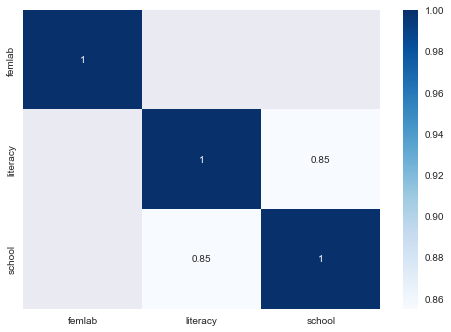

In [39]:
# Usa esta celda para generar heatmap solicitado, con valores > 0.6

sns.heatmap(df_corr[df_corr > 0.6], cmap="Blues", annot=True);



**Comentarios** Existe una alta relación entre school y leteracy

###  4. A partir de las principales correlaciones, separarlas en un nuevo objeto y calcular la matriz de correlaciones para todas las regiones (3 puntos):
- Comente brevemente las principales correlaciones a través de las regiones.

In [46]:
# Usa esta celda para generar df con las variables con principales correlaciones, de ser necesario

df_2 = df[["region", "literacy", "school"]]

In [51]:
# Usa esta celda para generar la matriz de correlaciones para cada región



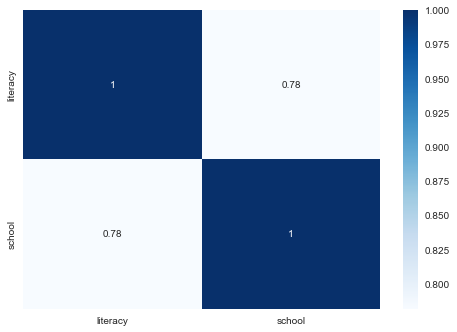

In [52]:
# Usa esta celda para mostrar las correlaciones de Africa

africa = df_2[df_2["region"]=="Africa"].corr().abs()

sns.heatmap(africa, cmap="Blues", annot=True);

**Comentarios** Para el caso de Africa existe una alta correlación entre las variables school y literacy.

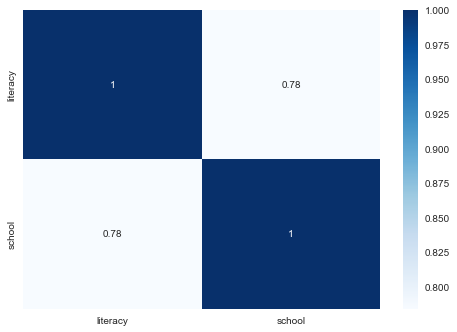

In [56]:
# Usa esta celda para mostrar las correlaciones de Americas

america = df_2[df_2["region"]=="Americas"].corr().abs()

sns.heatmap(america, cmap="Blues", annot=True);

**Comentarios** Para el caso de America existe una alta correlación entre las variables school y literacy.

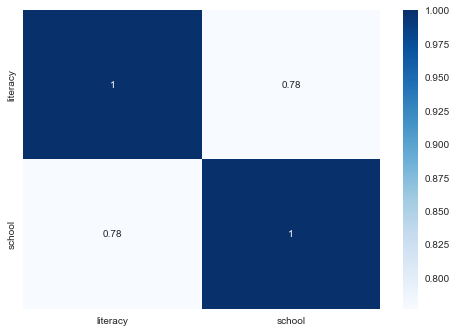

In [57]:
# Usa esta celda para mostrar las correlaciones de Asia

asia = df_2[df_2["region"]=="Asia"].corr().abs()

sns.heatmap(asia, cmap="Blues", annot=True);

**Comentarios** Para el caso de Asia existe una alta correlación entre las variables school y literacy.

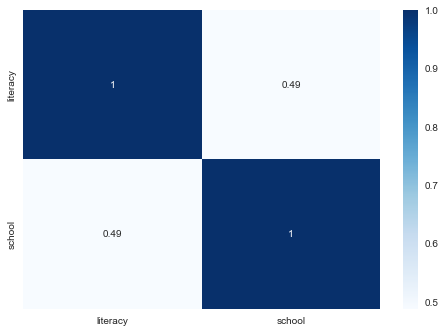

In [58]:
# Usa esta celda para mostrar las correlaciones de Europe

europe = df_2[df_2["region"]=="Europe"].corr().abs()

sns.heatmap(europe, cmap="Blues", annot=True);

**Comentarios** Para el caso de Europa al contrario de lo que uno supondría la correlación entre literacy y school no es tan significativa como en las otras regiones analizadas.

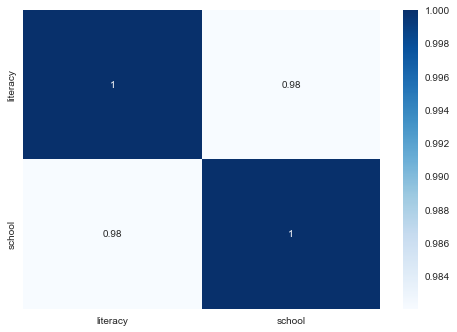

In [59]:
# Usa esta celda para mostrar las correlaciones de Oceanía

oceania = df_2[df_2["region"]=="Oceania"].corr().abs()

sns.heatmap(oceania, cmap="Blues", annot=True);

**Comentarios** Para el caso de Oceania, es la región donde existe la mayor correlación entre las variables school y literacy.